In [90]:

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from pprint import pprint
from tabulate import tabulate
from nltk.stem import WordNetLemmatizer
#from wordcloud import WordCloud

In [2]:
df = pd.read_csv("Scaled-VAD.csv", index_col = 0)
df['Joy'] = df['Joy'].replace(0,'Non-Joy')
df['Joy'] = df['Joy'].replace(1,'Joy')

In [3]:
#These are tweets that did not have a valence or arousal score
# number of tweets like this: 1738
#removed these from data frame
print(len(df))
ex = df[(df['V'] == -1) & (df['A']==-1)]
#print(list(ex['Tweet']))
inx = ex.index
df = df.drop(inx)
print(len(df))
#df goes from 18226 tweets to 16488 tweets

18226
16488


In [4]:
#Just Joy Tweets: These are all joy tweets with only the valence and arousal scores
#9113 examples index from 0 to 9112
joy = df.where(df["Joy"] == "Joy")
joy = joy.dropna(axis=0)
joy = joy.reset_index()
joy = joy.drop(columns = ["D", "Joy", "index"])
#length joy tweets: 9098

#Non-Joy Tweets Only
nonjoy = df.where(df["Joy"] == "Non-Joy")
nonjoy = nonjoy.dropna(axis=0)
nonjoy = nonjoy.reset_index()
nonjoy = nonjoy.drop(columns = ["D", "Joy", "index"])
#length non-joy tweets: 7390

In [5]:
# List of valence/arousal 
va_ar = []
i = 0
while i < len(joy["V"]):
    va_ar.append([joy["V"][i], joy["A"][i]])
    i+=1
    
    
nva_ar = []
i = 0
while i < len(nonjoy["V"]):
    nva_ar.append([nonjoy["V"][i], nonjoy["A"][i]])
    i+=1

a = va_ar + nva_ar

In [6]:
vaar = pd.DataFrame(va_ar, columns = ["V", "A"])
corr = vaar.corr()
print()
print("Joy Tweet Correlation Valence vs. Arousal")
print(corr)

nvaar = pd.DataFrame(nva_ar, columns = ["V", "A"])
ncorr = nvaar.corr()
print()
print("Non-Joy Tweet Correlation Valence vs. Arousal")
print(ncorr)

al= pd.DataFrame(a, columns = ["V", "A"])
al_corr = al.corr()
print()
print("All Tweets Correlation Valence vs. Arousal")
print(al_corr)


Joy Tweet Correlation Valence vs. Arousal
          V         A
V  1.000000  0.799502
A  0.799502  1.000000

Non-Joy Tweet Correlation Valence vs. Arousal
          V         A
V  1.000000  0.619951
A  0.619951  1.000000

All Tweets Correlation Valence vs. Arousal
          V         A
V  1.000000  0.660327
A  0.660327  1.000000


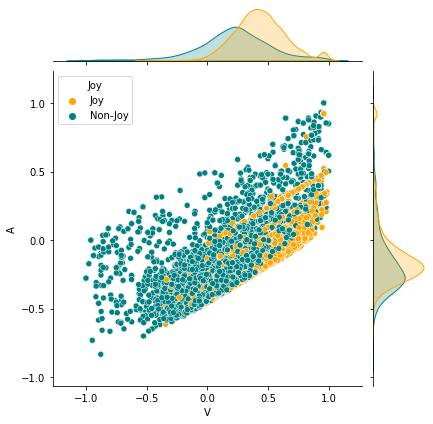

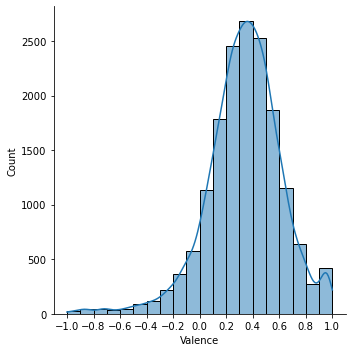

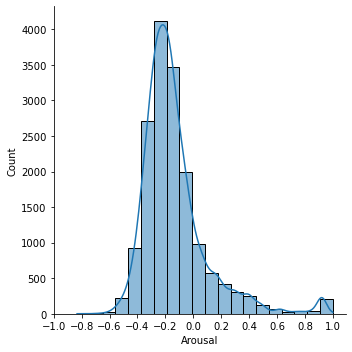

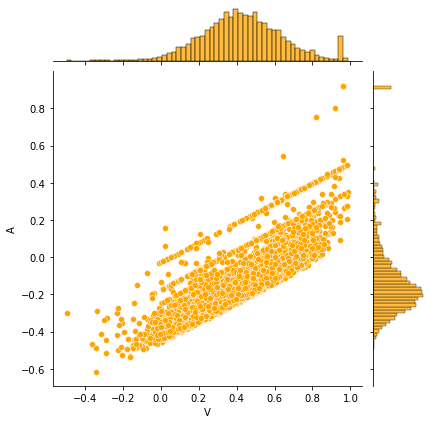

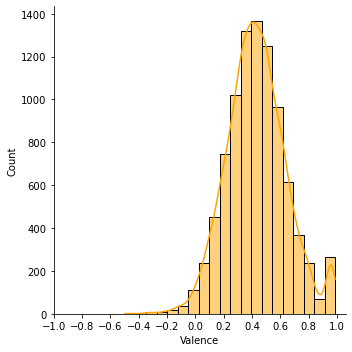

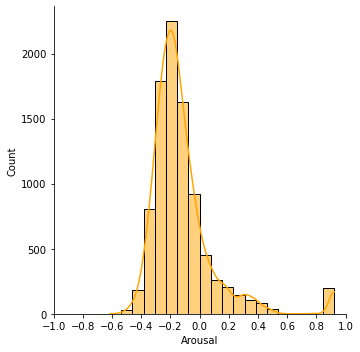

In [14]:
#Joint Plot from seaborn 
#Distribution plot



sns.jointplot(data=df, x="V", y="A", hue="Joy", palette = ["orange", "teal"]) #specify the hue
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.savefig('ValenceArousalJointPlot.jpeg')
plt.show()


sns.displot(df["V"], kde=True, bins=20)
plt.xlabel("Valence")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.savefig('AllValence.jpeg')
plt.show()


sns.displot(df["A"], kde=True, bins=20)
plt.xlabel("Arousal")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.savefig('AllArousal.jpeg')
plt.show()


sns.jointplot(data=joy, x="V", y="A", color = "orange")
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.savefig('Joy-ValenceArousalJointPlot.jpeg')
plt.show()


sns.displot(joy["V"], kde=True, bins=20, color = "orange")
plt.xlabel("Valence")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.savefig('JoyValence.jpeg')
plt.show()

sns.displot(joy["A"], kde=True, bins=20, color = "orange")
plt.xlabel("Arousal")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.savefig('JoyArousal.jpeg')
plt.show()


In [15]:
#Valence/Arousal Averages Across Joy Tweets
avg_va = str(joy["V"].mean())
avg_ar = str(joy["A"].mean())
print("Averages Across Joy Tweets~ " + "Valence: " + avg_va + "; Arousal: "+  avg_ar)

#Valence/Arousal Averages Across Non-Joy Tweets
avg_va_nonjoy = str(nonjoy["V"].mean())
avg_ar_nonjoy = str(nonjoy["A"].mean())
print("Averages Across Non-Joy Tweets~ " + "Valence: " + avg_va_nonjoy + "; Arousal: "+  avg_ar_nonjoy)

Averages Across Joy Tweets~ Valence: 0.43165960016882277; Arousal: -0.12165806272575876
Averages Across Non-Joy Tweets~ Valence: 0.21696936427284466; Arousal: -0.15238244382228733


In [77]:
#Look into the three high outliers of Joy Tweets
#all very positive V/A tweets are in one long string, then tokenize this and find word frequencies
#198 examples with valence and arousal above .9


joy_outliers = joy[(joy['V'] > .9) & (joy['A'] >.9)]
print(len(joy_outliers))
#print(list(joy_outliers['Tweet']))
joy_out = ""
for tweet in joy_outliers['Tweet']:
    joy_out = joy_out+" "+tweet
     
tokenizer = nltk.RegexpTokenizer(r"\w+")
token_pos = tokenizer.tokenize(joy_out)

fd_pos = nltk.FreqDist(token_pos)

#top 20 words in these very positive tweets

headers = ["Word", "Frequency"]
table = fd_pos.most_common(25)
table = tabulate(table, headers, tablefmt="grid")
print(table)
with open('CommonWordsPositiveJoyTweets.txt', 'w') as f:
    f.write(table)

##This is how the VAD lexicon data looks
# joy	0.980	0.824	0.794
# joyful	0.990	0.740	0.667
# joyous	0.958	0.580	0.728
# joyride	0.694	0.550	0.500
# joys	0.981	0.643

198
+------------+-------------+
| Word       |   Frequency |
+============+=============+
| joy        |         197 |
+------------+-------------+
| much       |          11 |
+------------+-------------+
| x          |          11 |
+------------+-------------+
| oh         |          10 |
+------------+-------------+
| chicago    |           9 |
+------------+-------------+
| black      |           8 |
+------------+-------------+
| im         |           5 |
+------------+-------------+
| yees       |           5 |
+------------+-------------+
| noodles    |           5 |
+------------+-------------+
| il         |           5 |
+------------+-------------+
| yee        |           5 |
+------------+-------------+
| boy        |           5 |
+------------+-------------+
| joyannreid |           3 |
+------------+-------------+
| reid       |           3 |
+------------+-------------+
| iam        |           3 |
+------------+-------------+
| lol        |           3 |
+---------

In [78]:
#all negative V/A tweets are in one long string, then tokenize this and find word frequencies
#129 tweets are negative valence and arousal
negative_joy = joy[(joy['V'] < 0) & (joy['A'] <0)]


all_neg_tw = ""
for tweet in negative_joy['Tweet']:
    all_neg_tw = all_neg_tw+" "+tweet

    
#print(all_neg_tw)
token_neq = tokenizer.tokenize(all_neg_tw)
fd = nltk.FreqDist(token_neq)

#top 20 words in these negative tweets
table_n = fd.most_common(25)
table_n = tabulate(table_n, headers, tablefmt="grid")
print(table_n)
with open('CommonWordsNegativeJoyTweets.txt', 'w') as f:
    f.write(table_n)


+------------+-------------+
| Word       |   Frequency |
+============+=============+
| joy        |         112 |
+------------+-------------+
| tears      |          20 |
+------------+-------------+
| let        |          13 |
+------------+-------------+
| pain       |          12 |
+------------+-------------+
| last       |          11 |
+------------+-------------+
| thief      |          10 |
+------------+-------------+
| amp        |          10 |
+------------+-------------+
| even       |          10 |
+------------+-------------+
| year       |           9 |
+------------+-------------+
| steal      |           9 |
+------------+-------------+
| put        |           9 |
+------------+-------------+
| bad        |           8 |
+------------+-------------+
| shit       |           8 |
+------------+-------------+
| loss       |           8 |
+------------+-------------+
| na         |           8 |
+------------+-------------+
| much       |           8 |
+------------+

In [36]:
#Look into the negative valence & arousal joy tweets
#129 examples of joy tweets with both negative scores
negative_joy = joy[(joy['V'] < 0) & (joy['A'] <0)]

#Interesting tweets in here!


#What are the words before and after the word joy in each tweet? steal joy, spread joy, etc. 
l = []
err = []
before_after = {}
for tweet in negative_joy['Tweet']:
    nltk.word_tokenize(tweet)
    res = tweet.split() 
    before_after = {}
    i = 0 
    while i <len(res):
        if res[i] == 'joy':
            try:
                before_after['before'] = res[i-2], res[i-1]
                before_after['after'] = res[i+1], res[i+2]
                #print(before_after)
                l.append(before_after)
            except:
                print(res)
                err.append(res)
                
        i+=1
         

['sdellag', 'p00fter', 'justjake1994', 'poplockedropit', 'jamesmasonfox', 'jamesholod', 'kennybenj', '’', 'follow', 'people', 'spout', 'negativity', 'time', 'mute', 'intentionally', 'unintentionally', 'make', 'anxious', 'angry', 'annoyed', 'twitter', 'bring', 'joy']
['mysterewoodz', 'suburban', 'teenage', 'emo', 'side', 'screaming', 'joy']
['farewell', 'delicious', 'venison', 'jerky', 'wholefoods', 'u', 'bogus', '9', 'pricetag', 'ill', 'never', 'forget', '72', 'seconds', 'joy']
['edge', 'ill', 'probably', 'shed', 'tears', 'joy']
['leethemonkey', 'gwolfstories', 'well', '’', 'loss', 'gon', 'na', 'let', 'ruin', 'joy']
['wept', 'tears', 'joy']
['woulda', 'beat', 'fuck', 'outta', 'old', 'white', 'bitches', 'joy', 'hear']
['ljoywilliams', 'sorry', 'loss', 'joy', '🙏🏾❤️']
['dvillella', 'dying', 'bedbug', 'rat', 'infested', 'covid19', 'virus', 'infested', 'hoteloh', 'joy']
['pain', 'joy', '😂']
['went', 'verge', 'crying', 'screaming', 'jumping', 'joy']
['carlosfilm', 'alv', 'dont', 'let', 'pend

In [13]:
#Create dataframe of words just before & after the negative tweets
b_a = pd.DataFrame(l)
print(b_a)
#it doesnt work for all negative tweets that don't have 2 words before & after joy
#That's why there's only 84 rows

                   before               after
0        (hollow, knight)        (con, drift)
1        (beat, specials)  (division, pogues)
2        (anger, sadness)       (fear, guilt)
3   (shit, thejoythieves)     (thieves, kill)
4            (cry, tears)              (’, ’)
..                    ...                 ...
79     (canned, misnamed)      (dumb, racist)
80            (na, steal)           (wan, na)
81    (comparison, thief)         (stfu, pls)
82           (cry, tears)        (victory, ✨)
83        (qb, richgonna)   (watching, young)

[84 rows x 2 columns]
